# **Scientific journal recommender for submitting a publication**

Parser:  
https://it.wikipedia.org/wiki/BibTeX  

In [1]:
import string

folder = "datasets/"

# Dataset

For each class (journal) there is a file in BibTeX format containing the articles published in that journal. Each file was cleaned and formatted with the following online tool [BibTeX Tidy](https://flamingtempura.github.io/bibtex-tidy/index.html).

Each article is represented by a record with the following fields:
* **abstract**: Abstract of the article.
* **author**: Author of the article.
* **ENTRYTYPE**: Type of entry (article, book, inproceedings, etc.).
* **doi**: Digital Object Identifier of the article.
* **ID**: Unique identifier of the article.
* **issn**: International Standard Serial Number of the journal in which the article was published.
* **journal**: Journal in which the article was published.
* **keywords**: Keywords of the article.
* **note**: Additional information about the article.
* **pages**: Pages of the article.
* **title**: Title of the article.
* **url**: URL of the article.
* **volume**: Volume of the journal in which the article was published.
* **year**: Year of publication of the article.

The goal is to create a model that is able to predict the **journal** in which it will be published.

In [2]:
import os
import bibtexparser
import pandas as pd

# 1, 3, 4, 5
def read_bib_to_dataframe(file_path):
    #with open(file_path, 'r', encoding='utf-8') as bibtex_file:
    with open(file_path, 'r', encoding='latin-1') as bibtex_file:
        return bibtexparser.load(bibtex_file)

for filename in os.listdir(folder):
    if filename.endswith(".bib"):
        filename_path = os.path.join(folder, filename)
        bib_data = read_bib_to_dataframe(filename_path)
        if bib_data.entries:
            df = pd.DataFrame(bib_data.entries)
            df.to_csv(os.path.splitext(filename_path)[0] + '.csv', index=False)
        else:
            print("Error: ", filename, " is empty")

In [3]:
import pandas as pd
import os
import gc

dfs = []
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        dfs.append(pd.read_csv(os.path.join(folder, filename)))

df = pd.concat(dfs, ignore_index=True)
df.to_csv(folder + 'all.csv', index=False)

for tmp_df in dfs:
    tmp_df = None
dfs = None

gc.collect()
df.head()

,abstract,keywords,author,url,doi,issn,year,pages,volume,journal,title,ENTRYTYPE,ID,note
0,This study proposed to investigate the thermal...,"Virtual reality headsets, Thermal comfort, Mic...",Zihao Wang and Renke He and Ke Chen,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.apergo.2020.103066,0003-6870,2020,103066,85,Applied Ergonomics,Thermal comfort and virtual reality headsets,article,WANG2020103066,NaN
1,A one-pedal system for operating an electric v...,"One-pedal operation, Electric vehicle, Emotion...",Fumie Sugimoto and Motohiro Kimura and Yuji Ta...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.apergo.2020.103179,0003-6870,2020,103179,88,Applied Ergonomics,Effects of one-pedal automobile operation on t...,article,SUGIMOTO2020103179,NaN
2,Surgery has changed significantly in recent ye...,"Human reliability analysis (HRA), HEART, Dynam...",Rossella Onofrio and Paolo Trucco,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.apergo.2020.103150,0003-6870,2020,103150,88,Applied Ergonomics,A methodology for Dynamic Human Reliability An...,article,ONOFRIO2020103150,NaN
3,Truck platoon driving is a current branch of a...,"Truck platoon driving, Technology acceptance, ...",Sarah-Maria Castritius and Heiko Hecht and Joh...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.apergo.2019.103042,0003-6870,2020,103042,85,Applied Ergonomics,Acceptance of truck platooning by professional...,article,CASTRITIUS2020103042,NaN
4,This paper presents a new handle for instrumen...,"Laparoscopic surgery, Handle design, Biomechanics",Ramon Sancibrian and Carlos Redondo-Figuero an...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.apergo.2020.103210,0003-6870,2020,103210,89,Applied Ergonomics,Ergonomic evaluation and performance of a new ...,article,SANCIBRIAN2020103210,NaN


# Feature Selection

The following features are selected:
* **abstract**: Abstract of the article.
* **keywords**: Keywords of the article.
* **title**: Title of the article.

The target feature is:
* **journal**: Journal in which the article was published.

In [8]:
# Removing unnecessary columns
import pandas as pd
df = pd.read_csv(folder + 'all.csv')

feature_names = ['abstract', 'keywords', 'title']
target_name = 'journal'

# Use the following features to remove id_feature combined with journal
'''
id_features = ['doi', 'ID', 'issn']
for feature in id_features:
	df = df.drop_duplicates(subset=[feature, target_name])
'''
# Remove nan values for journal
df = df.dropna(subset=[target_name])

print(df.info())
df = df[feature_names + [target_name]]
print(df.info())
df.head()

df.to_csv(folder + 'selected.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10228 entries, 0 to 10227
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   abstract   10085 non-null  object
 1   keywords   10042 non-null  object
 2   author     10107 non-null  object
 3   url        10228 non-null  object
 4   doi        10228 non-null  object
 5   issn       10228 non-null  object
 6   year       10228 non-null  int64 
 7   pages      10228 non-null  object
 8   volume     10228 non-null  int64 
 9   journal    10228 non-null  object
 10  title      10228 non-null  object
 11  ENTRYTYPE  10228 non-null  object
 12  ID         10228 non-null  object
 13  note       40 non-null     object
dtypes: int64(2), object(12)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10228 entries, 0 to 10227
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  10085 non-nu

In [9]:
# Cleaning data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

language = 'english'
# Convert to lowercase
df[feature_names] = df[feature_names].applymap(lambda x: str(x).lower())
# Remove stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words(language)
df[feature_names] = df[feature_names].apply(lambda x: x.apply(lambda words: ' '.join([w for w in words.split() if w not in stopwords_list])))
# Remove punctuation
nltk.download('punkt')
df[feature_names] = df[feature_names].apply(lambda x: x.str.translate(str.maketrans('', '', string.punctuation)))
# Stemming
stemmer = nltk.stem.SnowballStemmer(language=language)
df[feature_names] = df[feature_names].apply(lambda x: x.apply(lambda words: ' '.join([stemmer.stem(w) for w in words.split()])))
# Tokenize
df[feature_names] = df[feature_names].apply(lambda x: x.apply(nltk.word_tokenize))

#add journal_num column with numeric integer to process
labels = df[target_name].unique()
labels_value = list(labels)
# Ordina la lista in ordine alfabetico e assegna i rank
ranks_ordinati = [rank for rank, _ in sorted(enumerate(labels_value, start=0), key=lambda x: x[1])] # Estrai solo i rank ordinati
target_name_num = target_name + '_num'
df[target_name_num] = df[target_name].map(dict(zip(labels_value, ranks_ordinati)))

df.head()
df.to_csv(folder + 'selected_cleaned.csv', index=False)
df = None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **Text Representation**
Put all the words of the selected features in a single column.

In [10]:
import pandas as pd
import gc

folder = "datasets/"
feature_name = 'combined_text'
target_name = 'journal_num'
gc.collect()
df = pd.read_csv(folder + 'selected_cleaned.csv')

#df[feature_names] = df[feature_names].apply(lambda x: x.apply(lambda words: ' '.join(words)))
df[feature_name] = df[feature_names[0]]
for i in range(1, len(feature_names)):
    df[feature_name] = df[feature_name] + df[feature_names[i]]

#Selecting only feature_name and target_name_num
df = df[[feature_name, target_name_num]]
# Rename columns as X and y instead of feature_name and target_name_num
df.columns = ['X', 'y']
df.to_csv(folder + 'selected_cleaned_' + feature_name + '.csv', index=False)

# Divide the dataset into training and test sets

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import gc

folder = "datasets/"
df = pd.read_csv(folder + 'selected_cleaned_combined_text.csv')
df_train, df_test = train_test_split(df, train_size=0.8)
# Delete df to free memory
df = None
gc.collect()
df_train.to_csv(folder + 'selected_cleaned_combined_text_train.csv', index=False)
df_test.to_csv(folder + 'selected_cleaned_combined_text_test.csv', index=False)

## Bag of Words

The **Bag of Words** is a representation of a text that describes the occurrence of words within a document.
The Bag of Words is created using the following methods:
* **CountVectorizer**: It counts the number of times a word appears in a document.
* **TfidfVectorizer**: It counts the number of times a word appears in a document, but it also takes into account the frequency of the word in the entire corpus.

Parameters:
* **max_features**: Maximum number of features to be extracted.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

bow = CountVectorizer(max_features=1000)

folder = "datasets/"
df_train = pd.read_csv(folder + 'selected_cleaned_combined_text_train.csv')
df_test = pd.read_csv(folder + 'selected_cleaned_combined_text_test.csv')
X_train = bow.fit_transform(df_train['X']).toarray()
y_train = df_train['y']

X_test = bow.transform(df_test['X']).toarray()
y_test = df_test['y']

## Clasification

The classification is performed using the **Random Forest** algorithm.
It is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

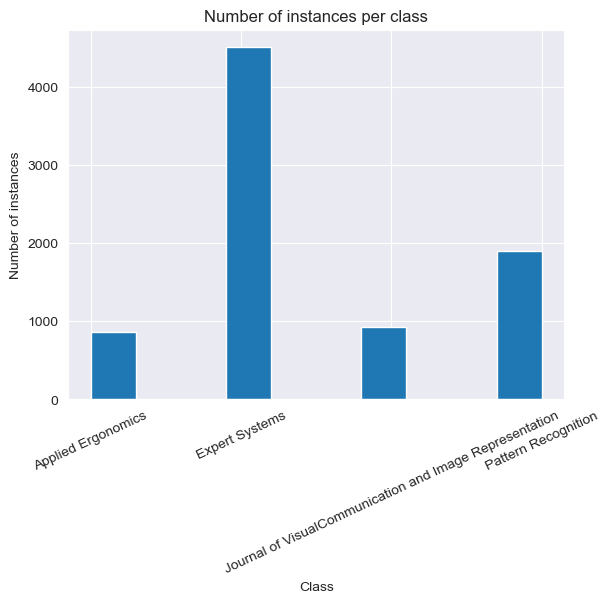

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       206
           1       0.81      0.95      0.87      1156
           2       0.86      0.27      0.41       229
           3       0.66      0.61      0.63       455

    accuracy                           0.79      2046
   macro avg       0.83      0.68      0.71      2046
weighted avg       0.80      0.79      0.77      2046


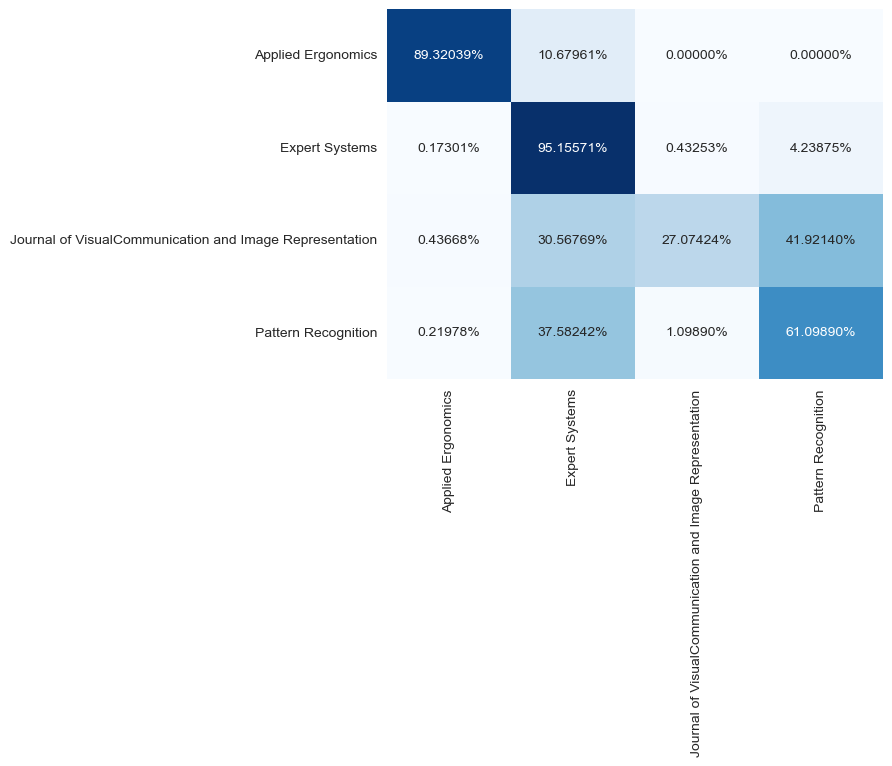

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

labels = ['Applied Ergonomics','Expert Systems','Journal of VisualCommunication and Image Representation' , 'Pattern Recognition']
labels_value = [0, 1, 2, 3]
def plot_class_distribution(y):
    plt.hist(y)
    plt.title("Number of instances per class")
    plt.xlabel("Class")
    plt.ylabel("Number of instances")
    plt.xticks(labels_value, labels)
    plt.xticks(rotation=25)
    plt.grid(True)
    plt.show()

def performance(y_test, y_pred):
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    # Plot cm and Rotate xticks 25 degrees
    sns.heatmap(cm, annot=True, fmt='.5%', cmap='Blues', yticklabels=labels, xticklabels=labels, cbar=False)
    plt.show()

plot_class_distribution(y_train)

# BoW ConuntVectorizer
cls = RandomForestClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

performance(y_test, y_pred)

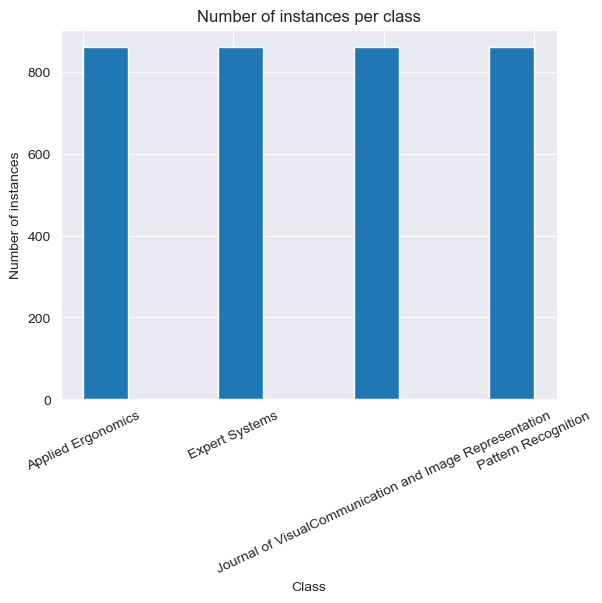

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       206
           1       0.81      0.96      0.88      1156
           2       0.84      0.27      0.41       229
           3       0.67      0.62      0.65       455

    accuracy                           0.80      2046
   macro avg       0.83      0.68      0.71      2046
weighted avg       0.80      0.80      0.78      2046


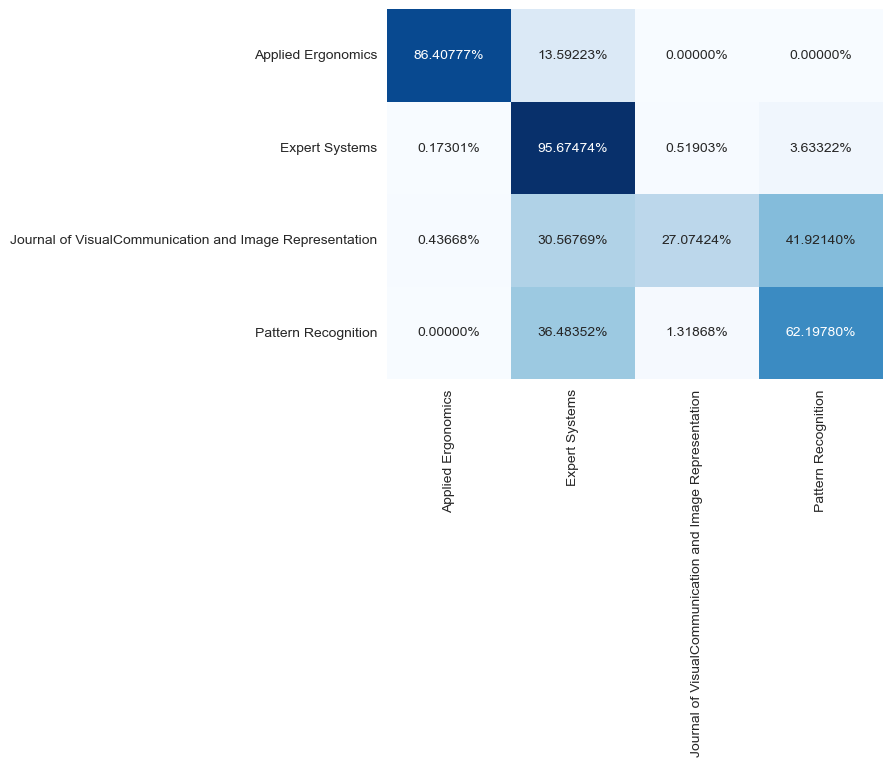

6558

In [24]:
from imblearn.under_sampling import RandomUnderSampler
import gc

sampler = RandomUnderSampler(random_state=42)

# BoW ConuntVectorizer
X_train_under_sampled, y_train_under_sampled = sampler.fit_resample(X_train, y_train)
plot_class_distribution(y_train_under_sampled)

cls = RandomForestClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

performance(y_test, y_pred)

#Clean memory
X_train_under_sampled = None
y_train_under_sampled = None
gc.collect()

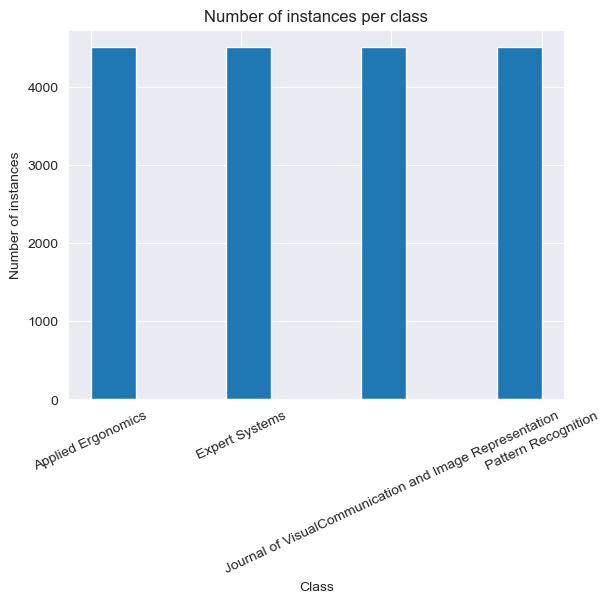

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       206
           1       0.85      0.90      0.88      1156
           2       0.73      0.42      0.54       229
           3       0.65      0.69      0.67       455

    accuracy                           0.80      2046
   macro avg       0.80      0.74      0.76      2046
weighted avg       0.80      0.80      0.80      2046


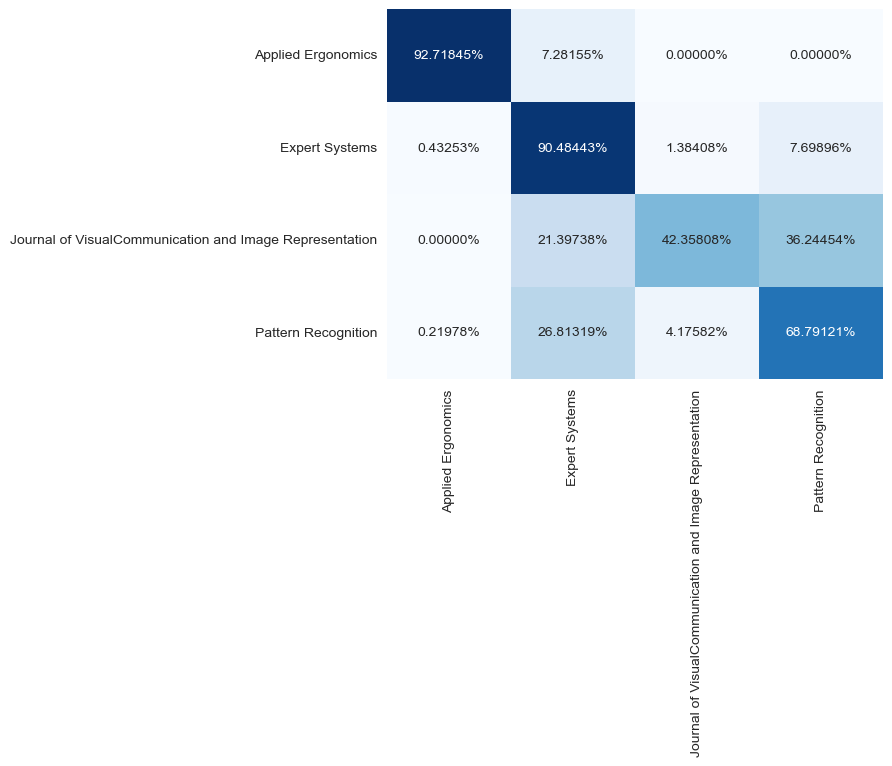

5955

In [25]:
from imblearn.over_sampling import RandomOverSampler
import gc

sampler = RandomOverSampler(random_state=42)

X_train_over_sampled, y_train_over_sampled = sampler.fit_resample(X_train, y_train)
plot_class_distribution(y_train_over_sampled)

cls = RandomForestClassifier()
cls.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = cls.predict(X_test)

performance(y_test, y_pred)

X_train_over_sampled = None
y_train_over_sampled = None
gc.collect()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

bow = TfidfVectorizer(max_features=1000)

df_train = pd.read_csv(folder + 'selected_cleaned_combined_text_train.csv')
df_test = pd.read_csv(folder + 'selected_cleaned_combined_text_test.csv')
X_train = bow.fit_transform(df_train['X']).toarray()
y_train = df_train['y']

X_test = bow.transform(df_test['X']).toarray()
y_test = df_test['y']

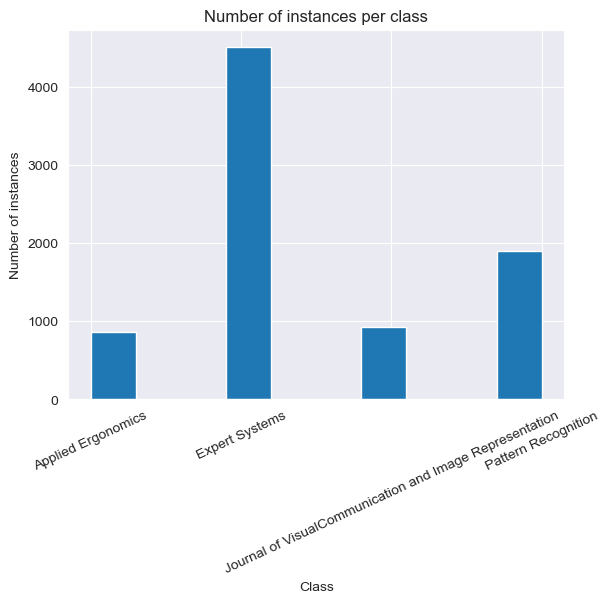

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       206
           1       0.80      0.96      0.87      1156
           2       0.89      0.28      0.42       229
           3       0.68      0.61      0.64       455

    accuracy                           0.80      2046
   macro avg       0.84      0.68      0.72      2046
weighted avg       0.80      0.80      0.78      2046


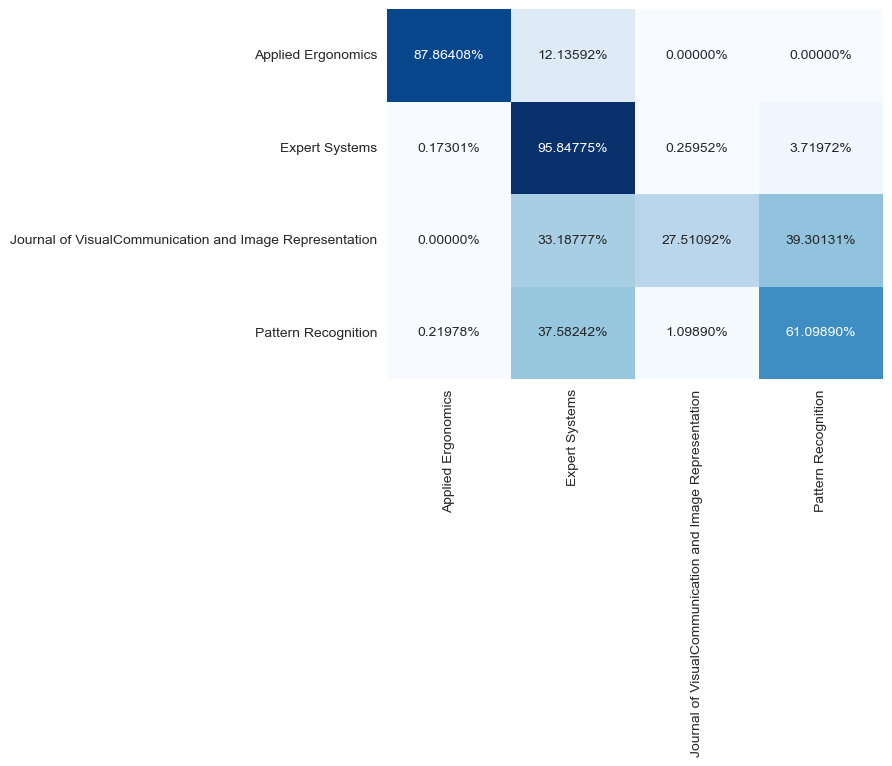

In [29]:
plot_class_distribution(y_train)

cls = RandomForestClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

performance(y_test, y_pred)

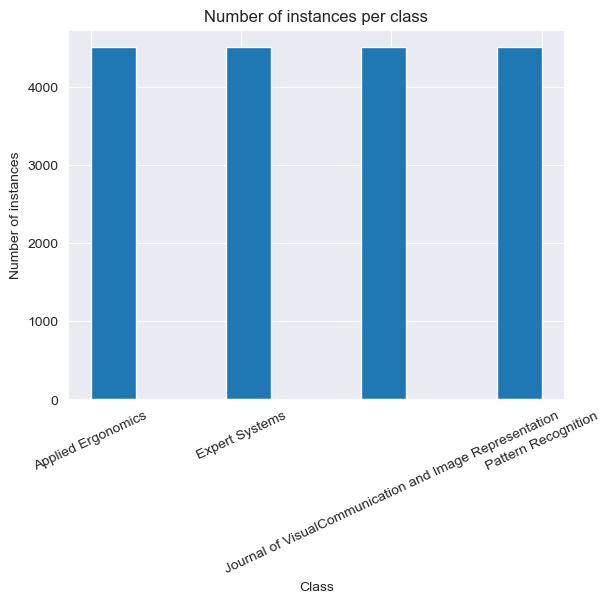

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       206
           1       0.81      0.95      0.87      1156
           2       0.81      0.24      0.37       229
           3       0.65      0.62      0.63       455

    accuracy                           0.79      2046
   macro avg       0.81      0.68      0.70      2046
weighted avg       0.79      0.79      0.77      2046


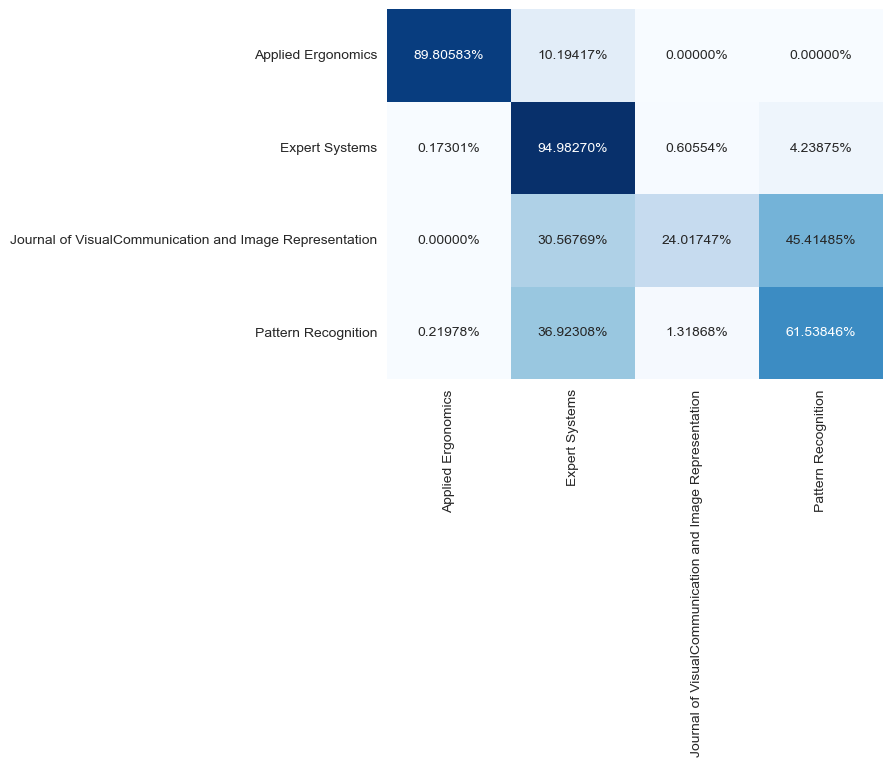

6157

In [30]:
from imblearn.under_sampling import RandomUnderSampler
import gc

X_train_under_sampled, y_train_under_sampled = sampler.fit_resample(X_train, y_train)
plot_class_distribution(y_train_under_sampled)

cls = RandomForestClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

performance(y_test, y_pred)

X_train_under_sampled = None
y_train_under_sampled = None
gc.collect()

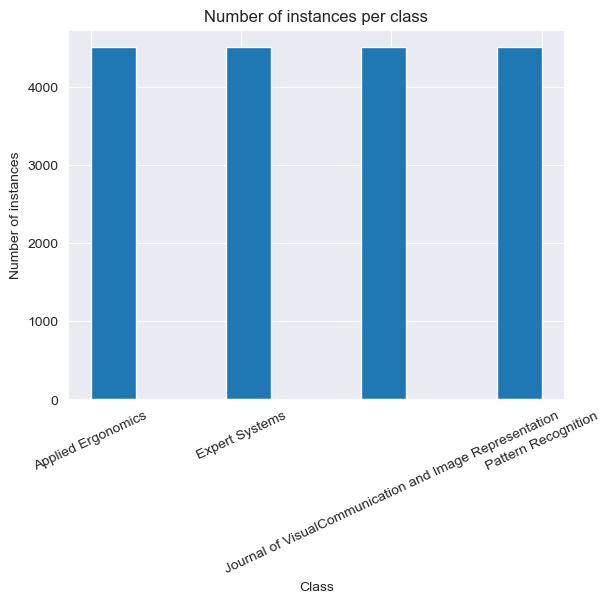

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       206
           1       0.84      0.91      0.88      1156
           2       0.76      0.39      0.51       229
           3       0.65      0.69      0.67       455

    accuracy                           0.80      2046
   macro avg       0.80      0.73      0.75      2046
weighted avg       0.80      0.80      0.80      2046


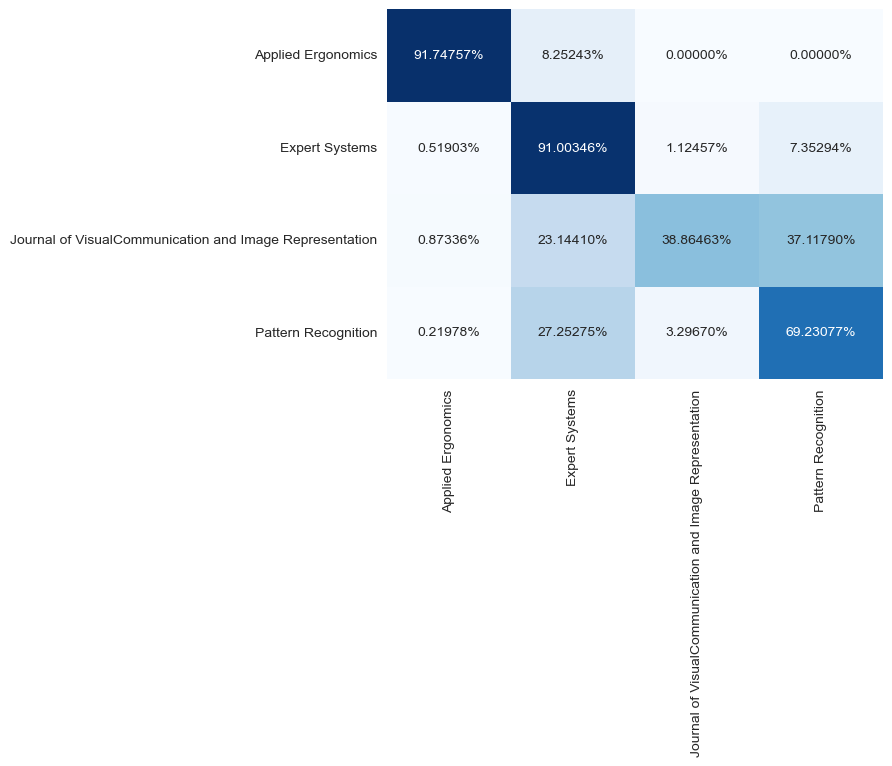

5955

In [31]:
from imblearn.over_sampling import RandomOverSampler
import gc

X_train_over_sampled, y_train_over_sampled = sampler.fit_resample(X_train, y_train)
plot_class_distribution(y_train_over_sampled)

cls = RandomForestClassifier()
cls.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = cls.predict(X_test)

performance(y_test, y_pred)

X_train = None
y_train = None
X_train_over_sampled = None
y_train_over_sampled = None
gc.collect()


## Connectionist techniques

In this case, after pre-processing, a neural network based on an LSTM unit is trained.

In [32]:
import tensorflow as tf
device = tf.config.list_physical_devices('GPU')
print('Num. tarjetas: ', len(device))

import pandas as pd
df = pd.read_csv(folder + 'selected_cleaned_combined_text.csv')
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.2, random_state=42)

print(X_train.shape)
print(y_test.shape)

Num. tarjetas:  0
(8182,)
(2046,)


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.utils import to_categorical

num_words = 1000
sequence_length = 100

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = sequence.pad_sequences(X_train_seq, maxlen=sequence_length)

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad= sequence.pad_sequences(X_test_seq, maxlen=sequence_length)

labels = df['y'].unique()
num_classes = len(labels)
# Convert your integer labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameters
embedding_dim = 50
lstm_units = 100

model = Sequential()
# Add an Embedding layer with input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length

model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length))

model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(units=num_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 110804 (432.83 KB)
Trainable params: 110804 (432.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Train the model using EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train_pad, y_train_one_hot, batch_size=32, epochs=5, validation_data=(X_test_pad, y_test_one_hot), callbacks=[callback])

Epoch 1/5
256/256 [==============================] - 48s 125ms/step - loss: 0.7532 - accuracy: 0.6923 - val_loss: 0.5484 - val_accuracy: 0.7669
Epoch 2/5
256/256 [==============================] - 27s 105ms/step - loss: 0.5211 - accuracy: 0.7865 - val_loss: 0.5181 - val_accuracy: 0.7879
Epoch 3/5
256/256 [==============================] - 24s 96ms/step - loss: 0.4684 - accuracy: 0.8148 - val_loss: 0.5322 - val_accuracy: 0.7805
Epoch 4/5
256/256 [==============================] - 24s 94ms/step - loss: 0.4276 - accuracy: 0.8323 - val_loss: 0.5159 - val_accuracy: 0.7972
Epoch 5/5
256/256 [==============================] - 24s 95ms/step - loss: 0.4092 - accuracy: 0.8354 - val_loss: 0.5122 - val_accuracy: 0.7942


In [36]:
# Evaluate the model on the test set using accuracy, f1-score, precision and recall
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

64/64 [==============================] - 5s 45ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       229
           1       0.89      0.85      0.87      1118
           2       0.60      0.51      0.55       224
           3       0.62      0.73      0.67       475

    accuracy                           0.79      2046
   macro avg       0.76      0.76      0.76      2046
weighted avg       0.80      0.79      0.80      2046
